In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])

df

,phone_model,phone_generation,phone_size,phone_color,claim,weeks_monday,month,year,month_year
0,apple iphone 11,iphone 11,128gb,black,111,2021-06-28,6,2021,2021-06-01
1,apple iphone 11,iphone 11,128gb,black,319,2021-07-05,7,2021,2021-07-01
2,apple iphone 11,iphone 11,128gb,black,320,2021-07-12,7,2021,2021-07-01
3,apple iphone 11,iphone 11,128gb,black,305,2021-07-19,7,2021,2021-07-01
4,apple iphone 11,iphone 11,128gb,black,269,2021-07-26,7,2021,2021-07-01
...,...,...,...,...,...,...,...,...,...
17874,apple iphone xs max,iphone x,64gb,silver,18,2023-01-16,1,2023,2023-01-01
17875,apple iphone xs max,iphone x,64gb,silver,19,2023-01-23,1,2023,2023-01-01
17876,apple iphone xs max,iphone x,64gb,silver,14,2023-01-30,1,2023,2023-01-01
17877,apple iphone xs max,iphone x,64gb,silver,13,2023-02-06,2,2023,2023-02-01


In [2]:
iphone12_df = df[df['phone_generation'] == 'iphone 12']
iphone12_df

,phone_model,phone_generation,phone_size,phone_color,claim,weeks_monday,month,year,month_year
3027,apple iphone 12,iphone 12,128gb,black,14,2021-08-02,8,2021,2021-08-01
3028,apple iphone 12,iphone 12,128gb,black,43,2021-08-09,8,2021,2021-08-01
3029,apple iphone 12,iphone 12,128gb,black,57,2021-08-16,8,2021,2021-08-01
3030,apple iphone 12,iphone 12,128gb,black,65,2021-08-23,8,2021,2021-08-01
3031,apple iphone 12,iphone 12,128gb,black,59,2021-08-30,8,2021,2021-08-01
...,...,...,...,...,...,...,...,...,...
6241,apple iphone 12 pro max,iphone 12,512gb,silver,7,2023-01-09,1,2023,2023-01-01
6242,apple iphone 12 pro max,iphone 12,512gb,silver,9,2023-01-16,1,2023,2023-01-01
6243,apple iphone 12 pro max,iphone 12,512gb,silver,5,2023-01-23,1,2023,2023-01-01
6244,apple iphone 12 pro max,iphone 12,512gb,silver,8,2023-01-30,1,2023,2023-01-01


In [3]:
iphone12_df = iphone12_df[['weeks_monday', 'claim']]
iphone12_df

,weeks_monday,claim
3027,2021-08-02,14
3028,2021-08-09,43
3029,2021-08-16,57
3030,2021-08-23,65
3031,2021-08-30,59
...,...,...
6241,2023-01-09,7
6242,2023-01-16,9
6243,2023-01-23,5
6244,2023-01-30,8


In [4]:
from datetime import datetime
iphone12_df = iphone12_df.groupby(['weeks_monday'])['claim'].sum().reset_index()
iphone12_df = iphone12_df.sort_values(by='weeks_monday')
#iphone12_df = iphone12_df .drop(index=0)
#iphone12_df['month']= iphone12_df['weeks_monday'].apply(lambda x: x.strftime('%Y-%m-%d'))
#iphone12_df['month'] = iphone12_df['month'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%B'))
iphone12_df.head(20)

,weeks_monday,claim
0,2021-06-28,422
1,2021-07-05,1017
2,2021-07-12,1045
3,2021-07-19,1144
4,2021-07-26,1157
5,2021-08-02,1212
6,2021-08-09,1363
7,2021-08-16,1362
8,2021-08-23,1394
9,2021-08-30,1383


In [5]:
iphone12_timeshift = iphone12_df.copy(deep = True)
iphone12_timeshift['1_week_ago'] = iphone12_timeshift['claim'].shift(1)
iphone12_timeshift['2_week_ago'] = iphone12_timeshift['1_week_ago'].shift(1)
iphone12_timeshift['3_week_ago'] = iphone12_timeshift['2_week_ago'].shift(1)
iphone12_timeshift = iphone12_timeshift.rename(columns={'claim': 'this_week'})
iphone12_timeshift = iphone12_timeshift.drop(iphone12_timeshift.columns[0], axis=1)
iphone12_timeshift =  iphone12_timeshift.dropna()
iphone12_timeshift = iphone12_timeshift.reset_index(drop=True)
iphone12_timeshift

,this_week,1_week_ago,2_week_ago,3_week_ago
0,1144,1045.0,1017.0,422.0
1,1157,1144.0,1045.0,1017.0
2,1212,1157.0,1144.0,1045.0
3,1363,1212.0,1157.0,1144.0
4,1362,1363.0,1212.0,1157.0
...,...,...,...,...
78,4277,3959.0,4189.0,3959.0
79,4136,4277.0,3959.0,4189.0
80,3764,4136.0,4277.0,3959.0
81,4604,3764.0,4136.0,4277.0


In [6]:
# last row looks abnormally low so let's drop it
iphone12_timeshift = iphone12_timeshift.drop(iphone12_timeshift.index[-1])
iphone12_timeshift

,this_week,1_week_ago,2_week_ago,3_week_ago
0,1144,1045.0,1017.0,422.0
1,1157,1144.0,1045.0,1017.0
2,1212,1157.0,1144.0,1045.0
3,1363,1212.0,1157.0,1144.0
4,1362,1363.0,1212.0,1157.0
...,...,...,...,...
77,3959,4189.0,3959.0,3299.0
78,4277,3959.0,4189.0,3959.0
79,4136,4277.0,3959.0,4189.0
80,3764,4136.0,4277.0,3959.0


# LinearRegression

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Split data into training and testing sets
train_data, test_data = train_test_split(iphone12_timeshift, test_size=0.2)

# Define input and output variables
X_train = train_data[['1_week_ago', '2_week_ago', '3_week_ago']]
y_train = train_data['this_week']
X_test = test_data[['1_week_ago', '2_week_ago', '3_week_ago']]
y_test = test_data['this_week']

# Choose a machine learning algorithm and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to make predictions for new data
#new_data = pd.DataFrame({'1_week_ago': [10], '2_week_ago': [15], '3_week_ago': [20]})
#prediction = model.predict(new_data)
#print('Prediction:', prediction)


LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('MSE:', mse)
print('R2:', r2)


MSE: 75327.07129106471
R2: 0.9400064931009521


# Decision Tree

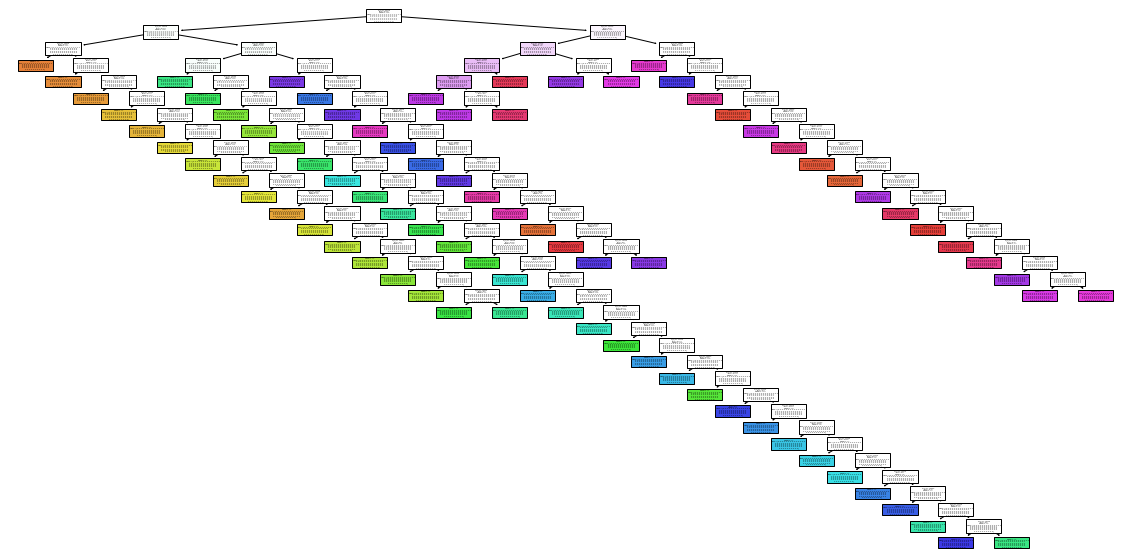

In [91]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier

X=iphone12_timeshift[['1_week_ago', '2_week_ago', '3_week_ago']]
Y=iphone12_timeshift[['this_week']]
clf = DecisionTreeClassifier()
clf.fit(X,y)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True)
plt.show()

## Lazy predict

In [101]:
#!pip install lazypredict
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle
import numpy as np


reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric = None)
# Train and test the models
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


100%|███████████████████████████████████████████| 42/42 [00:00<00:00, 69.55it/s]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
AdaBoostRegressor                            0.90       0.92   269.68   
RandomForestRegressor                        0.89       0.91   292.59   
BaggingRegressor                             0.87       0.90   306.16   
OrthogonalMatchingPursuitCV                  0.87       0.90   306.95   
OrthogonalMatchingPursuit                    0.87       0.90   306.95   
SGDRegressor                                 0.87       0.89   311.16   
BayesianRidge                                0.87       0.89   312.69   
LassoCV                                      0.87       0.89   312.97   
LassoLars                                    0.87       0.89   312.98   
LarsCV                                       0.87       0.89   313.00   
LassoLarsCV                                  0.87       0.89   313.00   
Lasso                                        0.87  

# AdaBoostRegressor  

[2067 2646 1706 4208 1144 1476 2898 1947 2423 2958 1903 3299 3528 4334
 3959 2052 1928] [2076.8125     3002.46153846 1867.         4194.92857143 1311.14285714
 1755.         2631.06666667 2047.14285714 2008.41176471 3835.45454545
 1984.23076923 4196.3        3754.45833333 4088.         4113.26666667
 1993.33333333 2107.6       ]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


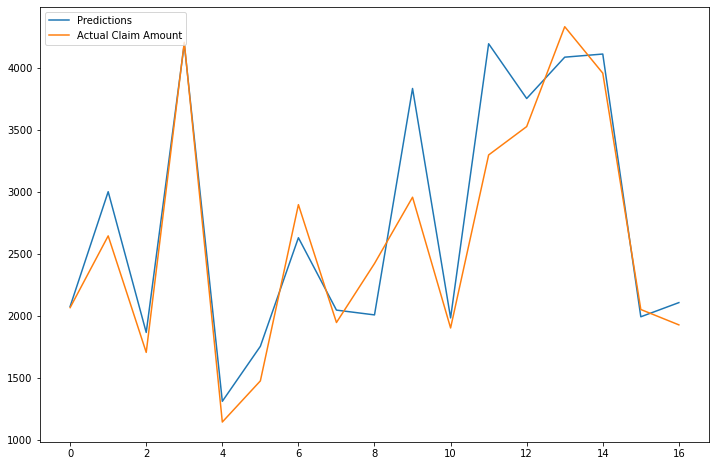

In [119]:
from sklearn import ensemble

from sklearn.ensemble import AdaBoostRegressor

AB_model=AdaBoostRegressor()
AB_model.fit(X_train, y_train)

pred1 = AB_model.predict(X_test)

print(y_test,pred1)
y_test=np.array(y_test)
print(type(y_test))
print(type(pred1))

#plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred1, label = "Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

# RandomForestRegressor

[2067 2646 1706 4208 1144 1476 2898 1947 2423 2958 1903 3299 3528 4334
 3959 2052 1928] [2111.21 3086.21 1582.26 4114.46 1199.16 1518.97 2708.01 2134.76 2019.87
 3977.44 1948.77 4160.11 3888.49 4088.04 4112.36 2021.89 2182.36]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


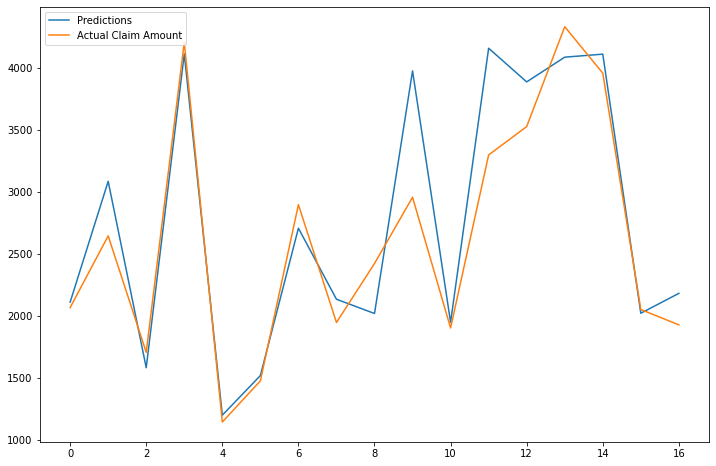

In [120]:
from sklearn.ensemble import RandomForestRegressor

RFR_model=RandomForestRegressor()
RFR_model.fit(X_train, y_train)

pred2 = RFR_model.predict(X_test)

print(y_test,pred2)
y_test=np.array(y_test)
print(type(y_test))
print(type(pred2))

#plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred2, label = "Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()

# BaggingRegressor 

[2067 2646 1706 4208 1144 1476 2898 1947 2423 2958 1903 3299 3528 4334
 3959 2052 1928] [2084.8 3042.  1583.9 4125.  1173.5 1608.4 2729.1 2108.6 2001.3 3895.
 1917.  4146.4 3702.4 4129.6 4096.5 2004.6 2163.2]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


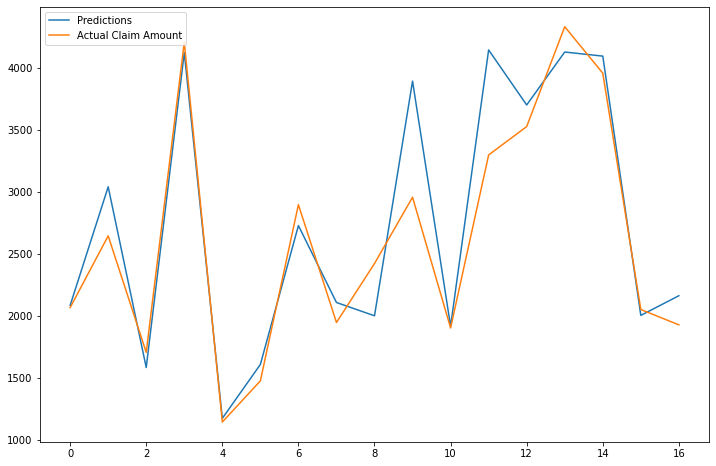

In [121]:
from sklearn.ensemble import BaggingRegressor

BR_model=BaggingRegressor()
BR_model.fit(X_train, y_train)

pred3 = BR_model.predict(X_test)

print(y_test,pred3)
y_test=np.array(y_test)

print(type(y_test))
print(type(pred3))

#plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred3, label = "Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()


# compare AB, RF, BR 

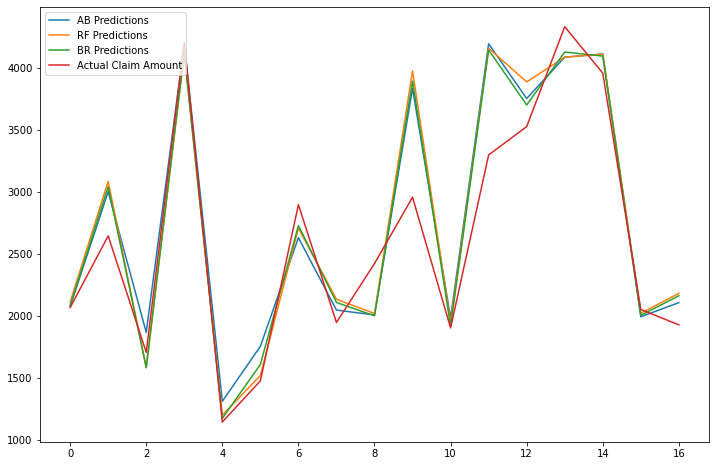

In [122]:
#plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred1, label = "AB Predictions")
plt.plot(pred2, label = "RF Predictions")
plt.plot(pred3, label = "BR Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()